In [1]:
import numpy as np
import pandas as pd
import math

pd.set_option('display.max_rows', 80)
pd.set_option('display.max_columns', 80)

import random
import pickle

import time

import sys
sys.path.append("../../")

from src.object import *
from src.create import *
from src.print_result import *

from config.formation import *
from config.config import *

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"

In [2]:
with open('../../data/pickle/20230111v1_30y.pickle', mode='rb') as f:
    ws = pickle.load(f)

In [3]:
all_member = create_all_member(ws, 2030)

In [4]:
output = pd.DataFrame()

for c in ws.country_leagues:
    output = pd.concat([output, c.players_result])

output = pd.concat([output, ws.players_result])
output = output.sort_values("年度")
ws.players_result = output

# 結果一覧

## リーグ・カップ戦結果

In [5]:
print("チーム一覧")
print()

for c in ws.country_leagues:
    for league_num in range(len(c.leagues)):
        print(c.leagues[league_num].name)
        print([[i, t.name] for i, t in enumerate(c.leagues[league_num].teams)])

    print()

for c in ws.country_leagues:
    for league_num in range(len(c.leagues)):
        display(c.leagues[league_num].champion)

    display(c.competition_result_top)

チーム一覧

Premier
[[0, 'Southampton'], [1, 'WestHam'], [2, 'Bournemouth'], [3, 'Tottenham'], [4, 'Blackpool'], [5, 'Birmingham'], [6, 'Swansea'], [7, 'Accrington'], [8, 'QPR'], [9, 'Rotherham'], [10, 'Lincoln'], [11, 'Nottingham'], [12, 'Leeds'], [13, 'Gillingham'], [14, 'Everton'], [15, 'Oxford'], [16, 'Blackburn'], [17, 'Crewe'], [18, 'Doncaster'], [19, 'ManchesterUnited']]
Championship
[[0, 'Fulham'], [1, 'Brentford'], [2, 'Wigan'], [3, 'ManchesterCity'], [4, 'Dons'], [5, 'Chalton'], [6, 'Burton'], [7, 'Middlesbrough'], [8, 'Huddersfield'], [9, 'Ipswitch'], [10, 'SheffieldUnited'], [11, 'CrystalPalace'], [12, 'Preston'], [13, 'Peterborough'], [14, 'Chelsea'], [15, 'Northampton'], [16, 'Burnely'], [17, 'ShefieldWednesday'], [18, 'Millwall'], [19, 'WBA']]
EFL1
[[0, 'Cardiff'], [1, 'AFC'], [2, 'Fleetwood'], [3, 'Arsenal'], [4, 'Norwich'], [5, 'Bristol'], [6, 'Plymouth'], [7, 'Wolverhampton'], [8, 'Reading'], [9, 'Coventry'], [10, 'Sunderland'], [11, 'Leicester'], [12, 'Brighton'], [13, 'S

,優勝,得点王,MVP,yMVP,ベストGK
Premier_2000,Chelsea,"Dash(Liverpool), / 26点","Dash(Liverpool),","Brodie(Chelsea),","Sky(Southampton),"
Premier_2001,WestHam,"Devone(Brighton), / 26点","Mozell(WestHam),","Michael(Arsenal),","Tyreese(WestHam),"
Premier_2002,WestHam,"Mozell(WestHam), / 29点","Mozell(WestHam),","Reynolds(HullCity),","Markanthony(Chelsea),"
Premier_2003,WestHam,"Anson(Leeds), Clovis(WestHam), Mozell(WestHam)...","Mozell(WestHam),","Isom(WestHam),","Dickey(Bournemouth),"
Premier_2004,Bournemouth,"Brodie(Chelsea), / 27点","Brodie(Chelsea),","Emory(ManchesterCity),","Dickey(Bournemouth),"
Premier_2005,Bournemouth,"Olegario(Arsenal), Caleb(CrystalPalace), Abdul...","Upton(Bournemouth),","Phillips(Wolverhampton),","Dickey(Bournemouth),"
Premier_2006,Bournemouth,"Cooper(Newcastle), / 24点","Michael(Arsenal),","Hank(Leicester),","Dickey(Bournemouth),"
Premier_2007,CrystalPalace,"Taurean(Southampton), / 33点","Dearl(Newcastle),","Cooper(ManchesterCity),","Terrin(ManchesterCity),"
Premier_2008,Brighton,"Dearl(Newcastle), / 31点","Kenn(WestHam),","Demtrius(WestHam),","Fay(Chelsea),"
Premier_2009,AstonVilla,"Dearl(AstonVilla), / 36点","Dearl(AstonVilla),","Emily(Newcastle),","Watt(Newcastle),"


,優勝,得点王,MVP,yMVP,ベストGK
Championship_2000,Preston,"Yue(LutonTown), / 23点","Darcy(Preston),","Elder(Huddersfield),","Jerell(Burnely),"
Championship_2001,Leicester,"Kejuan(Leicester), / 29点","Kejuan(Leicester),","Jarad(Leicester),","Francois(Leicester),"
Championship_2002,Birmingham,"Rudi(Swansea), Scyler(Nottingham), / 22点","Raphael(Birmingham),","Secundino(LutonTown),","Tedd(Nottingham),"
Championship_2003,Coventry,"Calvert(Coventry), / 24点","Demarius(Leicester),","Corneluis(Coventry),","Mackey(Leicester),"
Championship_2004,Nottingham,"Jawad(ManchesterUnited), / 25点","Elder(QPR),","Scyler(Nottingham),","Jonas(ManchesterUnited),"
Championship_2005,Preston,"Tanvir(Everton), / 23点","Athan(Preston),","Athan(Preston),","Vann(Preston),"
Championship_2006,Oxford,"Schneur(SheffieldUnited), / 23点","Rolando(Birmingham),","Willam(Norwich),","Cornelio(Oxford),"
Championship_2007,Tottenham,"Christie(Blackpool), Homer(Norwich), / 24点","Quinten(Tottenham),","Rickie(Stoke),","Awan(Norwich),"
Championship_2008,Blackpool,"Jubal(Gillingham), Jaren(Gillingham), / 24点","Jubal(Gillingham),","Modesto(Blackpool),","Clifton(Everton),"
Championship_2009,Oxford,"Roswell(Nottingham), / 26点","Torsten(Lincoln),","Christoph(Portsmouth),","Thomas(Oxford),"


,優勝,得点王,MVP,yMVP,ベストGK
EFL1_2000,Peterborough,"Lenzy(Crewe), / 27点","Quenton(Peterborough),","Kareem(AFC),","Robet(Plymouth),"
EFL1_2001,Burton,"Otto(Burton), / 30点","Otto(Burton),","Jsaon(Portsmouth),","Makiah(WBA),"
EFL1_2002,Middlesbrough,"Darreon(Doncaster), / 22点","Raine(Middlesbrough),","Kerby(Doncaster),","Nicholos(Doncaster),"
EFL1_2003,SheffieldUnited,"Mario(SheffieldUnited), Willam(Cardiff), / 24点","Jatorian(SheffieldUnited),","Mario(SheffieldUnited),","Vanderbilt(Oxford),"
EFL1_2004,Dons,"Babyboy(Chalton), Chancey(Chalton), / 23点","Albert(Rotherham),","Tonya(Dons),","Sammy(Dons),"
EFL1_2005,Plymouth,"Rafael(LutonTown), / 27点","Rafael(LutonTown),","Layke(Huddersfield),","Vanderbilt(Plymouth),"
EFL1_2006,Portsmouth,"Quincy(Lincoln), / 23点","Kameran(Doncaster),","Kameran(Doncaster),","Amr(AFC),"
EFL1_2007,Plymouth,"Kysen(Peterborough), / 26点","Doral(Plymouth),","Joal(Ipswitch),","Vineet(Plymouth),"
EFL1_2008,WBA,"Lealon(Rotherham), / 23点","Mustafa(WBA),","Blaine(Fleetwood),","Tatsuya(Brentford),"
EFL1_2009,Bristol,"Dayl(Dons), / 29点","Woodruff(Bristol),","Woodruff(Bristol),","Isidore(Bristol),"


,年度,優勝,準優勝,得点王
FA杯_2000,2000,Leeds(Premier),Leicester(Premier),"Demarien(Leeds(Premier)), / 9点"
FA杯_2001,2001,Southampton(Premier),WestHam(Premier),"Teryl(Southampton(Premier)), / 7点"
FA杯_2002,2002,Bournemouth(Premier),Liverpool(Premier),"Mozell(WestHam(Premier)), / 10点"
FA杯_2003,2003,Arsenal(Premier),Bournemouth(Premier),"Anson(Leeds(Premier)), / 9点"
FA杯_2004,2004,WestHam(Premier),AstonVilla(Premier),"Clovis(WestHam(Premier)), / 7点"
FA杯_2005,2005,CrystalPalace(Premier),Bournemouth(Premier),"Caleb(CrystalPalace(Premier)), / 8点"
FA杯_2006,2006,Leicester(Premier),Newcastle(Premier),"Caleb(CrystalPalace(Premier)), Kyheem(Leiceste..."
FA杯_2007,2007,Wolverhampton(Premier),Burnely(Premier),"Cooper(ManchesterCity(Premier)), / 6点"
FA杯_2008,2008,Southampton(Premier),Bournemouth(Premier),"Chett(Burnely(Premier)), / 8点"
FA杯_2009,2009,Tottenham(Premier),Burnely(Premier),"Taylon(Chelsea(Premier)), Waleed(Tottenham(Pre..."


,優勝,得点王,MVP,yMVP,ベストGK
La Liga Santander_2000,Cadiz,"Tirrell(RealValladolid), / 27点","Judah(AtleticoDeMadrid),","Fayez(Celta),","Odarrius(AthleticBilbao),"
La Liga Santander_2001,AtleticoDeMadrid,"Aristeo(AthleticBilbao), / 26点","Judah(AtleticoDeMadrid),","Therdore(Girona),","Silvio(RealValladolid),"
La Liga Santander_2002,AthleticBilbao,"Harley(Cadiz), / 25点","Harley(Cadiz),","Fayez(Celta),","Odarrius(AthleticBilbao),"
La Liga Santander_2003,AtleticoDeMadrid,"Dillon(Osasuna), / 26点","Elaine(Espanyol),","Johnathan(Espanyol),","Jerard(Espanyol),"
La Liga Santander_2004,Cadiz,"Dillon(Osasuna), / 28点","Justo(Cadiz),","Jak(Cadiz),","Tedford(Cadiz),"
La Liga Santander_2005,Celta,"Lorin(Girona), / 33点","Fayez(Celta),","Lorin(Girona),","Eusebio(Cadiz),"
La Liga Santander_2006,Osasuna,"Tony(RealBetis), / 29点","Arch(Osasuna),","Arch(Osasuna),","Jonas(Almenia),"
La Liga Santander_2007,Celta,"Euel(Vilarreal), / 23点","Fayez(Celta),","Obert(Valencia),","Watt(RealMadrid),"
La Liga Santander_2008,RacingSantander,"Joniel(Osasuna), / 29点","Siam(RealSocidad),","Darrian(RacingSantander),","Jemery(RacingSantander),"
La Liga Santander_2009,RealBetis,"Tony(RealBetis), / 23点","Dennie(RealBetis),","Jory(AtleticoDeMadrid),","Anselmo(Deporivo),"


,優勝,得点王,MVP,yMVP,ベストGK
La Liga SmartBank_2000,Levante,"Breon(Andorra), / 24点","Garnett(Levante),","Erie(Deporivo),","Jemery(Malaga),"
La Liga SmartBank_2001,Deporivo,"Goodwin(Deporivo), Fannie(RacingSantander), ...","Erie(Deporivo),","Erie(Deporivo),","Jag(Gijon),"
La Liga SmartBank_2002,Malaga,"Gay(Gijon), / 25点","Gavino(Malaga),","Carmello(Malaga),","Nasario(Malaga),"
La Liga SmartBank_2003,Almenia,"Adrion(Badajoz), Geremy(Almenia), / 24点","Garnett(Levante),","Geremy(Almenia),","Malvin(Getafe),"
La Liga SmartBank_2004,Malaga,"Michal(Getafe), / 24点","Selwyn(Malaga),","Yashua(Vilarreal),","Yashua(Vilarreal),"
La Liga SmartBank_2005,RealMadrid,"Goodwin(Tenerife), Mart(Almenia), / 21点","Waleed(RealMadrid),","Guerry(RealMadrid),","Watt(RealMadrid),"
La Liga SmartBank_2006,Levante,"Camilo(Lugo), / 23点","Dzenan(Malaga),","Wilkin(Levante),","Doil(Lugo),"
La Liga SmartBank_2007,Tenerife,"Carlyle(Tenerife), / 25点","Carlyle(Tenerife),","Coleson(Tenerife),","Venson(Fuenlabrada),"
La Liga SmartBank_2008,Lugo,"Espn(Intercity), / 22点","Dan(Malaga),","Dajohn(Malaga),","Venson(Lugo),"
La Liga SmartBank_2009,Tenerife,"Dason(Castellon), / 25点","Lonzo(RealValladolid),","Lando(Catagena),","Terral(Tenerife),"


,優勝,得点王,MVP,yMVP,ベストGK
Primera Division RFEF_2000,Algeciras,"Teodoro(Merida), / 29点","Virgel(Algeciras),","Teodoro(Merida),","Mitesh(Algeciras),"
Primera Division RFEF_2001,Badajoz,"Tivon(Ceuta), / 33点","Tivon(Ceuta),","Arlie(SanSebastian),","Michael(SanSebastian),"
Primera Division RFEF_2002,Tenerife,"Jane(Lugo), Mathew(Albacete), / 22点","Avrum(Tenerife),","Lou(Tenerife),","Anival(Tenerife),"
Primera Division RFEF_2003,Lugo,"Romio(Eibar), / 29点","Jene(Lugo),","Marvion(Ceuta),","Irie(Lugo),"
Primera Division RFEF_2004,UDLasPalmas,"Veldon(Ponferradina), / 26点","Armen(Ponferradina),","Sheila(UDLasPalmas),","Jaxin(Leganes),"
Primera Division RFEF_2005,Huesca,"Joshu(Castellon), / 28点","Oman(Huesca),","Sulaiman(Lugo),","Hakim(Lugo),"
Primera Division RFEF_2006,Eibar,"Alvan(Albacete), / 23点","Tilden(RealZaragoza),","Jahvon(SanFernando),","Hezekiah(Eibar),"
Primera Division RFEF_2007,Castellon,"Mando(Burgos), / 26点","Mando(Burgos),","Sanders(Numancia),","Brittney(Leonesa),"
Primera Division RFEF_2008,Albacete,"Chace(SanFernando), / 28点","Arch(Albacete),","Chace(SanFernando),","Didier(Talavera),"
Primera Division RFEF_2009,Burgos,"Huston(Rayo), / 23点","Erie(Burgos),","Erie(Burgos),","Jamile(Pontevedra),"


,年度,優勝,準優勝,得点王
カラバオ杯_2000,2000,AtleticoDeMadrid(La Liga Santander),Valencia(La Liga Santander),"Huron(Valencia(La Liga Santander)), / 6点"
カラバオ杯_2001,2001,RealValladolid(La Liga Santander),Sevilla(La Liga Santander),"Ladd(Sevilla(La Liga Santander)), / 7点"
カラバオ杯_2002,2002,Cadiz(La Liga Santander),AthleticBilbao(La Liga Santander),"Ryon(Cadiz(La Liga Santander)), / 7点"
カラバオ杯_2003,2003,Celta(La Liga Santander),RealMadrid(La Liga Santander),"Emory(RealMadrid(La Liga Santander)), Fayez(Ce..."
カラバオ杯_2004,2004,Sevilla(La Liga Santander),AthleticBilbao(La Liga Santander),"Matheus(AthleticBilbao(La Liga Santander)), / 6点"
カラバオ杯_2005,2005,Uniponstas(La Liga SmartBank),SanSebastian(La Liga SmartBank),"Rome(Osasuna(La Liga Santander)), Kreg(Unipons..."
カラバオ杯_2006,2006,Girona(La Liga Santander),Celta(La Liga Santander),"Rudy(Celta(La Liga Santander)), Ranson(Girona(..."
カラバオ杯_2007,2007,Girona(La Liga Santander),RealMadrid(La Liga Santander),"Joniel(Osasuna(La Liga Santander)), Lorin(Giro..."
カラバオ杯_2008,2008,Deporivo(La Liga Santander),Vilarreal(La Liga Santander),"Lorin(Girona(La Liga Santander)), / 7点"
カラバオ杯_2009,2009,RealBetis(La Liga Santander),Ibiza(La Liga Santander),"Rudy(Celta(La Liga Santander)), Rudi(Ibiza(La ..."


,優勝,得点王,MVP,yMVP,ベストGK
Bundesliga_2000,Mainz,"Jefferson(Hamburger), / 21点","Brekken(Mainz),","Climmie(Schalke),","Tomas(Schalke),"
Bundesliga_2001,Mainz,"Adrion(BorussiaMG), / 29点","Brekken(Mainz),","Chandler(Freiburg),","Tomas(Schalke),"
Bundesliga_2002,Bochum,"Guy(Freiburg), / 26点","Brekken(Mainz),","Darnelle(Bayern),","Rahmir(UnionBerlin),"
Bundesliga_2003,Hamburger,"Harley(Hamburger), / 27点","Harley(Hamburger),","Beaux(Hamburger),","Odarrius(Hannover),"
Bundesliga_2004,Hannover,"Harley(Hamburger), / 22点","Peterson(Hamburger),","Rhyan(Augsburg),","Odarrius(Hannover),"
Bundesliga_2005,Hannover,"Mitchal(GreutherFurch), / 27点","Chandler(Augsburg),","Chandler(Augsburg),","Odarrius(Hannover),"
Bundesliga_2006,Wolfsburg,"Marcus(Wolfsburg), / 27点","Matheus(Wolfsburg),","Jerrard(Wolfsburg),","Sinclair(Wolfsburg),"
Bundesliga_2007,Wolfsburg,"Joyce(Dortmund), / 25点","Heriberto(Hamburger),","Nathaniel(Dortmund),","Sinclair(Wolfsburg),"
Bundesliga_2008,Wolfsburg,"Chandler(Wolfsburg), / 33点","Chandler(Wolfsburg),","Derin(Wolfsburg),","Sinclair(Wolfsburg),"
Bundesliga_2009,Wolfsburg,"Matheus(Wolfsburg), / 30点","Matheus(Wolfsburg),","Derin(Wolfsburg),","Sinclair(Wolfsburg),"


,優勝,得点王,MVP,yMVP,ベストGK
2.Bundesliga_2000,Hannover,"Dov(Hannover), / 25点","Dov(Hannover),","Amando(Heidenheim),","Merton(Hannover),"
2.Bundesliga_2001,DynamoDresden,"Nevaeh(DynamoDresden), Rodolph(Erzgebirge), ...","Rodolph(Erzgebirge),","Rodolph(Erzgebirge),","Kenden(Paderborn),"
2.Bundesliga_2002,Koln,"Pascal(Regensburg), / 22点","Kline(Koln),","Ronit(Nuremberg),","Klever(Hoffenheim),"
2.Bundesliga_2003,Magdeburg,"Steffen(Hoffenheim), / 21点","Cort(Sandhausen),","Hugo(Braunschweig),","Denman(Leverkusen),"
2.Bundesliga_2004,Elversberg,"Taurean(Regensburg), / 23点","Taurean(Regensburg),","Taurean(Regensburg),","Alonzo(Leipzing),"
2.Bundesliga_2005,Nuremberg,"Wykeem(Bielefeld), / 29点","Travonne(Nuremberg),","Tre(Nuremberg),","Denman(Leverkusen),"
2.Bundesliga_2006,Meppen,"Renaldo(Regensburg), / 25点","Tylee(Meppen),","Armando(Meppen),","Lennie(Meppen),"
2.Bundesliga_2007,Larlsruher,"Lucious(Hoffenheim), / 27点","Lucious(Hoffenheim),","Rayane(Sandhausen),","Finis(Elversberg),"
2.Bundesliga_2008,Regensburg,"Ulises(Aalen), / 22点","Merced(RotWeiss),","Jamile(RotWeiss),","Fredrico(Aalen),"
2.Bundesliga_2009,Leverkusen,"Hudson(LickersOffenbach), / 32点","Jarol(Leverkusen),","Antwine(Magdeburg),","Errick(Bayreuth),"


,優勝,得点王,MVP,yMVP,ベストGK
3.Bundeliga_2000,RotWeiss,"Chad(Saarbrucken), / 25点","Dolan(RotWeiss),","Arnell(Meppen),","Dawayne(MSV),"
3.Bundeliga_2001,Aalen,"Telly(WehenWiesbaden), / 27点","Telly(WehenWiesbaden),","Jerimie(Bayreuth),","Camillo(LickersOffenbach),"
3.Bundeliga_2002,Hallescher,"Ronte(Zwickau), / 24点","Zevin(Hallescher),","Raja(Waldhof),","Javarrius(Hallescher),"
3.Bundeliga_2003,Aalen,"Kerri(TSV), / 23点","Ellery(Aalen),","Durward(Aalen),","Lindsey(TSV),"
3.Bundeliga_2004,RotWeiss,"Aviel(Oldenburg), / 28点","Telly(WehenWiesbaden),","Keon(Meppen),","Diamonte(Dusseldorf),"
3.Bundeliga_2005,Dusseldorf,"Terrion(Paderborn), / 24点","Loyal(Vert),","Loyal(Vert),","Erika(Homburg),"
3.Bundeliga_2006,StPauli,"Lacey(SSVUlm), Telly(WehenWiesbaden), / 21点","Mahir(StPauli),","Mahir(StPauli),","Canyon(StPauli),"
3.Bundeliga_2007,RotWeiss,"Shakil(Braunschweig), / 22点","Norvel(RotWeiss),","Britt(Saarbrucken),","Rudolph(RotWeiss),"
3.Bundeliga_2008,Darmstadt,"Dzenan(Darmstadt), / 23点","Dzenan(Darmstadt),","Valentin(TSV),","Doyce(TSV),"
3.Bundeliga_2009,Saarbrucken,"Tajee(Zwickau), Dionicio(SSVUlm), / 25点","Harald(VfL),","Roarke(Holstein),","Sunday(VfL),"


,年度,優勝,準優勝,得点王
DFBポカール_2000,2000,Bremen(Bundesliga),Bochum(Bundesliga),"Leanord(Bochum(Bundesliga)), Amjad(Braunschwei..."
DFBポカール_2001,2001,Augsburg(Bundesliga),Paderborn(2.Bundesliga),"Breon(Augsburg(Bundesliga)), / 6点"
DFBポカール_2002,2002,BorussiaMG(Bundesliga),Mainz(Bundesliga),"Orien(BorussiaMG(Bundesliga)), / 9点"
DFBポカール_2003,2003,Hamburger(Bundesliga),Bremen(Bundesliga),"Cary(Hamburger(Bundesliga)), / 7点"
DFBポカール_2004,2004,Hannover(Bundesliga),Freiburg(Bundesliga),"Niall(Hannover(Bundesliga)), / 5点"
DFBポカール_2005,2005,Hamburger(Bundesliga),Frankufurt(Bundesliga),"Cemal(Hamburger(Bundesliga)), / 8点"
DFBポカール_2006,2006,Wolfsburg(Bundesliga),Hannover(Bundesliga),"Akia(Wolfsburg(Bundesliga)), Ermil(Wolfsburg(B..."
DFBポカール_2007,2007,GreutherFurch(Bundesliga),Sandhausen(2.Bundesliga),"Aristeo(Hannover(Bundesliga)), Kim(Sandhausen(..."
DFBポカール_2008,2008,Nuremberg(Bundesliga),Wolfsburg(Bundesliga),"Mc(Nuremberg(Bundesliga)), / 7点"
DFBポカール_2009,2009,Dortmund(Bundesliga),Freiburg(Bundesliga),"Delrico(Frankufurt(Bundesliga)), / 7点"


,優勝,得点王,MVP,yMVP,ベストGK
Ligue1_2000,RCLens,"Mariusz(OL), Arturo(Clermont), / 23点","Arturo(Clermont),","Ryden(OM),","Nason(RCLens),"
Ligue1_2001,RCLens,"Basil(StadeRennais), / 24点","Ronda(RCLens),","York(Lille),","Nason(RCLens),"
Ligue1_2002,RCLens,"Chancy(OM), Windell(Lorient), / 25点","Christofer(RCLens),","York(Lille),","Nason(RCLens),"
Ligue1_2003,OM,"Donnie(Lille), / 26点","York(Lille),","Markel(PSG),","Errick(Clermont),"
Ligue1_2004,OM,"York(Lille), / 33点","York(Lille),","Errick(Clermont),","Errick(Clermont),"
Ligue1_2005,Clermont,"Jame(Angers), / 24点","Errick(Clermont),","Errick(Clermont),","Errick(Clermont),"
Ligue1_2006,RCLens,"Marlowe(RCLens), / 26点","Percy(RCLens),","Burton(SaintEtlenne),","Errick(Clermont),"
Ligue1_2007,Angers,"Morton(Montpellier), Dillon(Reims), / 25点","Morton(Montpellier),","Isauro(RCLens),","Errick(Clermont),"
Ligue1_2008,Ajaccio,"Toney(Auxerre), / 29点","Tenzing(Ajaccio),","Therron(Ajaccio),","Artemus(Angers),"
Ligue1_2009,Montpellier,"Toney(Auxerre), / 32点","Toney(Auxerre),","Panayiotis(Auxerre),","Amous(Nimes),"


,優勝,得点王,MVP,yMVP,ベストGK
Ligue2_2000,Amiens,"Kelson(Metz), / 23点","Martyn(Dijon),","Rephael(Amiens),","Chester(Amiens),"
Ligue2_2001,Monaco,"Keyaun(Strasbourg), / 26点","Keyaun(Strasbourg),","Darris(Strasbourg),","Omar(Strasbourg),"
Ligue2_2002,Annecy,"Laurence(Bastia), / 26点","Laurence(Bastia),","Laurence(Bastia),","Blase(Annecy),"
Ligue2_2003,Strasbourg,"Higinio(Bordeaux), Lonnell(Havre), Peretz(Bres...","Bengamin(Strasbourg),","Bengamin(Strasbourg),","Omar(Strasbourg),"
Ligue2_2004,SaintEtlenne,"Alon(Rodez), / 23点","Scott(Grenoble),","Taym(Briochin),","Jenaro(SaintEtlenne),"
Ligue2_2005,Nimes,"Sidi(Metropole), / 26点","Celso(Nimes),","Celso(Nimes),","Bram(Havre),"
Ligue2_2006,Metz,"Bergen(Metz), / 27点","Bergen(Metz),","Besnik(Metz),","Lakin(Metz),"
Ligue2_2007,Grenoble,"Littleton(Voltigeurs), Korrey(Sedan), Dionicio...","Sidi(Metropole),","Brison(Avranches),","Jeancarlo(Metropole),"
Ligue2_2008,Avranches,"Sigmund(PSG), / 25点","Hasaan(Niortais),","Jeryl(Avranches),","Erek(Avranches),"
Ligue2_2009,PSG,"Homer(Sedan), Saathvik(Metropole), / 22点","Murad(PSG),","Kiere(Sedan),","Murad(PSG),"


,優勝,得点王,MVP,yMVP,ベストGK
Ligue3_2000,Paris13,"Layton(Villefranche), / 25点","Aleksei(Versaille),","Trammell(Nancy),","Shevy(Paris13),"
Ligue3_2001,Orleans,"Kiere(Orleans), / 23点","Joshual(Orleans),","Adonis(Avranches),","Byron(Briochin),"
Ligue3_2002,Villefranche,"Elad(Voltigeurs), / 24点","Elad(Voltigeurs),","Elad(Voltigeurs),","Dwight(Niortais),"
Ligue3_2003,Voltigeurs,"Barnard(Sedan), / 24点","Jermy(Vbourg),","Nelton(Granville),","Grey(Guingamp),"
Ligue3_2004,Chateauroux,"Esgar(LeMans), / 24点","Sirron(Chateauroux),","Sirron(Chateauroux),","Parrish(Concarneau),"
Ligue3_2005,Orleans,"Dawayne(Orleans), / 25点","Thaddius(Concarneau),","Thaddius(Concarneau),","Emile(Guingamp),"
Ligue3_2006,Vbourg,"Harold(Vbourg), / 24点","Harold(Vbourg),","Harold(Vbourg),","Edgar(Vbourg),"
Ligue3_2007,Borgo,"Irfan(RedStar), / 22点","Leeland(Concarneau),","Barren(Amiens),","Nils(Concarneau),"
Ligue3_2008,Granville,"Anthony(Orleans), / 24点","Thedford(Granville),","Thedford(Granville),","Brier(Versaille),"
Ligue3_2009,Strasbourg,"Jerard(Vbourg), / 24点","Treyson(Strasbourg),","Marland(Dijon),","Isaiah(Vbourg),"


,年度,優勝,準優勝,得点王
クープ・デュ・フランス_2000,2000,Nice(Ligue1),Clermont(Ligue1),"Dangelo(Nice(Ligue1)), Arturo(Clermont(Ligue1)..."
クープ・デュ・フランス_2001,2001,OM(Ligue1),Angers(Ligue1),"Dangelo(Nice(Ligue1)), / 6点"
クープ・デュ・フランス_2002,2002,Clermont(Ligue1),Toulouse(Ligue1),"Chancy(OM(Ligue1)), / 7点"
クープ・デュ・フランス_2003,2003,Reims(Ligue1),Orleans(Ligue2),"Higinio(Bordeaux(Ligue2)), Igor(Orleans(Ligue2..."
クープ・デュ・フランス_2004,2004,Clermont(Ligue1),Lorient(Ligue1),"Levon(Lorient(Ligue1)), / 6点"
クープ・デュ・フランス_2005,2005,Trotes(Ligue1),Rodez(Ligue2),"Morton(Montpellier(Ligue1)), / 6点"
クープ・デュ・フランス_2006,2006,OM(Ligue1),Angers(Ligue1),"Joyce(Clermont(Ligue1)), / 6点"
クープ・デュ・フランス_2007,2007,OM(Ligue1),Auxerre(Ligue1),"Waleed(OM(Ligue1)), / 7点"
クープ・デュ・フランス_2008,2008,Toulouse(Ligue1),Montpellier(Ligue1),"Joesph(Montpellier(Ligue1)), Morton(Montpellie..."
クープ・デュ・フランス_2009,2009,Angers(Ligue1),Ajaccio(Ligue1),"Isauro(RCLens(Ligue1)), Marland(Dijon(Ligue3))..."


,優勝,得点王,MVP,yMVP,ベストGK
SerieA_2000,Milan,"Wing(Bologna), / 28点","Alrick(Spezia),","Paytin(Monza),","Jamall(Sampdoria),"
SerieA_2001,Atalanta,"Abdulmalik(Torino), / 30点","Osa(Atalanta),","Jaamal(Napoli),","Lonell(Roma),"
SerieA_2002,Juventus,"Froilan(Genoa), / 34点","Dasan(Juventus),","Tavante(Atalanta),","Nakia(Juventus),"
SerieA_2003,Juventus,"Adrion(Juventus), / 38点","Upton(Juventus),","Sharrod(Salernitana),","Nakia(Juventus),"
SerieA_2004,Juventus,"Winifred(Juventus), / 34点","Winifred(Juventus),","Carroll(Verona),","Nakia(Juventus),"
SerieA_2005,Spezia,"Brodie(Spezia), / 35点","Brodie(Spezia),","Demar(Pisa),","Tedford(Spezia),"
SerieA_2006,Spezia,"Brodie(Spezia), / 31点","Brodie(Spezia),","Marcellius(Pisa),","Reynolds(Napoli),"
SerieA_2007,Spezia,"Clovis(Lazio), Legrand(Pisa), / 21点","Keneth(Spezia),","Dewayne(Empoli),","Tedford(Spezia),"
SerieA_2008,Pisa,"Ebin(Pisa), / 32点","Legrand(Pisa),","Duard(Pisa),","Duard(Pisa),"
SerieA_2009,Pisa,"Ebin(Pisa), / 32点","Ebin(Pisa),","Barnard(Frosinone),","Duard(Pisa),"


,優勝,得点王,MVP,yMVP,ベストGK
SerieB_2000,SPAL,"Chauncy(SPAL), / 25点","Chauncy(SPAL),","Chauncy(SPAL),","Anthonio(Parma),"
SerieB_2001,Lazio,"Doy(Como), / 23点","Charlton(Cossenza),","Mitchal(Lazio),","Sotirios(Cremonese),"
SerieB_2002,Empoli,"Ayinde(Brescia), Cleon(Benevento), / 24点","Ayinde(Brescia),","Darryll(Cittadella),","Laurel(Cittadella),"
SerieB_2003,Lazio,"Lathaniel(Lecco), / 22点","Keanon(Ternana),","Ebin(Lecco),","Allan(Lazio),"
SerieB_2004,Lecco,"Kham(SPAL), / 26点","Angela(Perugia),","Korrey(Palermo),","Jase(Pisa),"
SerieB_2005,Mantova,"Carolina(Bari), / 22点","Carolina(Bari),","Arlen(Benevento),","Gentry(Modena),"
SerieB_2006,Bari,"Shelly(Empoli), / 29点","Carolina(Bari),","Anival(Bari),","Mithcell(Bari),"
SerieB_2007,AuroraPro,"Jhon(AuroraPro), / 23点","Jhon(AuroraPro),","Antwone(Inter),","Froilan(Inter),"
SerieB_2008,Frosinone,"Blong(Frosinone), / 25点","Jarret(Perugia),","Adlai(SPAL),","Cletes(Como),"
SerieB_2009,Mantova,"Tristan(Cremonese), Wilbur(Cittadella), / 19点","Tristan(Cremonese),","Denis(Mantova),","Cid(Cremonese),"


,優勝,得点王,MVP,yMVP,ベストGK
SerieC_2000,Novara,"Ari(Novara), / 26点","Reg(Triestina),","Niall(Padova),","Elan(Virtusvecomp),"
SerieC_2001,Lecco,"Mccoy(Hosoe), / 25点","Mccoy(Hosoe),","Mccoy(Hosoe),","Stefen(Lecco),"
SerieC_2002,Hosoe,"Kavish(Triestina), / 31点","Coulter(Triestina),","Adison(Padova),","Jomel(Vicenza),"
SerieC_2003,Feralpisalo,"Reshawn(Virtusvecomp), / 24点","Seymour(Albinoleffe),","Antiono(Feralpisalo),","Tyra(Albinoleffe),"
SerieC_2004,AuroraPro,"Alfonza(Triestina), / 25点","Dontrey(Arzignano),","Dontrey(Arzignano),","Donald(Arzignano),"
SerieC_2005,Albinoleffe,"Aaditya(Ascoli), Edward(Vicenza), Tae(Virtusve...","Teodoro(Sudtirol),","Teodoro(Sudtirol),","Isabel(Albinoleffe),"
SerieC_2006,Triestina,"Dekendrick(Sampdoria), / 30点","Zevin(Arzignano),","Dekendrick(Sampdoria),","Avelardo(Sampdoria),"
SerieC_2007,Ascoli,"Marion(Reggina), Rolfe(Albinoleffe), / 22点","Ascher(Ascoli),","Aadil(Venezia),","Geoffery(Ascoli),"
SerieC_2008,Novara,"Armon(Novara), Stillman(Hosoe), Yonic(Feralpis...","Othello(Hosoe),","Othello(Hosoe),","Lawson(Feralpisalo),"
SerieC_2009,Virtusvecomp,"Enrique(Udinese), / 22点","Levester(Padova),","Zaki(Virtusvecomp),","Fausto(Virtusvecomp),"


,年度,優勝,準優勝,得点王
コパ・イタリア_2000,2000,Roma(SerieA),Napoli(SerieA),"Harris(Roma(SerieA)), / 8点"
コパ・イタリア_2001,2001,Roma(SerieA),Inter(SerieA),"Harris(Roma(SerieA)), Calvin(Sampdoria(SerieA)..."
コパ・イタリア_2002,2002,Roma(SerieA),Milan(SerieA),"Zepplin(Milan(SerieA)), Denon(Milan(SerieA)), ..."
コパ・イタリア_2003,2003,Lecce(SerieA),Torino(SerieA),"Mandel(Lecce(SerieA)), / 8点"
コパ・イタリア_2004,2004,Juventus(SerieA),Udinese(SerieA),"Adrion(Juventus(SerieA)), / 9点"
コパ・イタリア_2005,2005,Lazio(SerieA),Spezia(SerieA),"Clovis(Lazio(SerieA)), / 11点"
コパ・イタリア_2006,2006,Spezia(SerieA),Salernitana(SerieA),"Brodie(Spezia(SerieA)), / 12点"
コパ・イタリア_2007,2007,Spezia(SerieA),Lazio(SerieA),"Darrik(Atalanta(SerieA)), Carroll(Lazio(SerieA..."
コパ・イタリア_2008,2008,Empoli(SerieA),Roma(SerieA),"Cyril(Roma(SerieA)), / 9点"
コパ・イタリア_2009,2009,AuroraPro(SerieA),Roma(SerieA),"Mitchal(Bologna(SerieA)), / 7点"


,優勝,得点王,MVP,yMVP,ベストGK
Liga Portugal_2000,Moreirense,"Larence(Moreirense), / 27点","Larence(Moreirense),","Gillie(Moreirense),","Zachery(Porto),"
Liga Portugal_2001,Arouca,"Larence(Moreirense), / 25点","Lory(Arouca),","Borna(Vicente),","Zachery(Porto),"
Liga Portugal_2002,Portimonense,"Quinten(Chaves), / 25点","Lory(Arouca),","Quinten(Chaves),","Gerson(Portimonense),"
Liga Portugal_2003,Benfica,"Kongmeng(Benfica), / 26点","Kongmeng(Benfica),","Bayard(Famalicao),","Zedric(Benfica),"
Liga Portugal_2004,Guimaraes,"Kirsten(Guimaraes), / 32点","Tommaso(Guimaraes),","Damarion(Guimaraes),","Toribio(Penafiel),"
Liga Portugal_2005,AcademicoViseu,"Lewis(funcial), / 27点","Kirby(AcademicoViseu),","Kirby(AcademicoViseu),","Lennie(Estoril),"
Liga Portugal_2006,Amadora,"Early(Amadora), / 29点","Maynor(Vicente),","Blayn(Arouca),","Cleve(Chaves),"
Liga Portugal_2007,Guimaraes,"Harmon(Porto), / 23点","Karl(Penafiel),","Korie(Guimaraes),","Detron(funcial),"
Liga Portugal_2008,SportingCP,"Minor(Braga), / 24点","Minor(Braga),","Brannan(SportingCP),","Hoke(Amadora),"
Liga Portugal_2009,Guimaraes,"Durell(Guimaraes), / 28点","Reymond(Guimaraes),","Taeshon(Guimaraes),","Brownie(Guimaraes),"


,優勝,得点王,MVP,yMVP,ベストGK
Liga Portugal2_2000,Penafiel,"Rayburn(Trofense), / 26点","Chyler(Lisbon),","Jaye(Penafiel),","Ramesh(BSAD),"
Liga Portugal2_2001,Amadora,"Lundy(funcial), / 30点","Lundy(funcial),","Ariana(Amadora),","Simcha(Amadora),"
Liga Portugal2_2002,Trofense,"Humphrey(Farense), / 26点","Loye(BSAD),","Eston(BSAD),","Windell(BSAD),"
Liga Portugal2_2003,Amadora,"Elery(Estoril), / 26点","Ector(Amadora),","Ector(Amadora),","Simcha(Amadora),"
Liga Portugal2_2004,k4sen,"Dartanian(CasaPia), / 22点","Deaundra(k4sen),","Deaundra(k4sen),","Igor(k4sen),"
Liga Portugal2_2005,Leixoes,"Mitchelle(Tondeia), Dastan(Farense), / 22点","Mitchelle(Tondeia),","Shaw(Oliveirense),","James(Porto),"
Liga Portugal2_2006,Tondeia,"Arshdeep(Nacional), / 26点","Brannan(SportingCP),","Waqas(Boavista),","Pascal(Moreirense),"
Liga Portugal2_2007,Feirense,"Humphrey(Feirense), / 23点","Jessee(Uniap Torreense),","Jeryl(Lisbon),","Derryl(Lisbon),"
Liga Portugal2_2008,Boavista,"Deyon(BSAD), / 22点","Pratik(Maritimo),","Dee(kerus),","Dawson(Maritimo),"
Liga Portugal2_2009,Benfica,"Slate(Benfica), / 25点","Slate(Benfica),","Slate(Benfica),","Rockland(Benfica),"


,年度,優勝,準優勝,得点王
ポルトガル杯_2000,2000,Portimonense(Liga Portugal),CasaPia(Liga Portugal),"Ren(CasaPia(Liga Portugal)), Gray(CasaPia(Liga..."
ポルトガル杯_2001,2001,RioAve(Liga Portugal),Vicente(Liga Portugal),"Colon(SportingCP(Liga Portugal)), Jerrick(Feir..."
ポルトガル杯_2002,2002,Benfica(Liga Portugal),Famalicao(Liga Portugal),"Kongmeng(Benfica(Liga Portugal)), Grayland(Fam..."
ポルトガル杯_2003,2003,Benfica(Liga Portugal),Amadora(Liga Portugal2),"Coby(Benfica(Liga Portugal)), / 5点"
ポルトガル杯_2004,2004,Porto(Liga Portugal),RioAve(Liga Portugal),"Kongmeng(Benfica(Liga Portugal)), Minnie(Marit..."
ポルトガル杯_2005,2005,Famalicao(Liga Portugal),Vicente(Liga Portugal),"Maynor(Vicente(Liga Portugal)), / 4点"
ポルトガル杯_2006,2006,Chaves(Liga Portugal),Boavista(Liga Portugal2),"Andreus(Chaves(Liga Portugal)), Klaus(Trofense..."
ポルトガル杯_2007,2007,Portimonense(Liga Portugal),AcademicoViseu(Liga Portugal),"Deontra(Portimonense(Liga Portugal)), / 5点"
ポルトガル杯_2008,2008,Guimaraes(Liga Portugal),AcademicoViseu(Liga Portugal),"Malikai(Guimaraes(Liga Portugal)), / 6点"
ポルトガル杯_2009,2009,Portimonense(Liga Portugal),Vicente(Liga Portugal),"Steffen(Portimonense(Liga Portugal)), / 7点"


,優勝,得点王,MVP,yMVP,ベストGK
Pro League_2000,ClubBrugge,"Aarian(ClubBrugge), / 25点","Kavon(Seraing),","Eusebio(Kortrijk),","Truong(ClubBrugge),"
Pro League_2001,ZulteWaregem,"Hasaan(ZulteWaregem), / 23点","Hasaan(ZulteWaregem),","Nyshawn(ZulteWaregem),","Javian(ZulteWaregem),"
Pro League_2002,ZulteWaregem,"Harlon(ZulteWaregem), / 23点","Dannell(ZulteWaregem),","Dashon(Gent),","Cleophas(Westerlo),"
Pro League_2003,Oostende,"Amiri(URSLVisé), / 23点","Solomon(Gent),","Stonewall(Oostende),","Amrit(Lommel),"
Pro League_2004,Gent,"Herchel(Knokke), / 21点","Herchel(Knokke),","Efrain(Genk),","Gabryle(RAALLaLouvière),"
Pro League_2005,ClubBrugge,"Mccoy(Knokke), / 25点","Stonewall(Oostende),","Stonewall(Oostende),","Makhai(Oostende),"
Pro League_2006,URSLVisé,"Linton(RSCAFutures), / 23点","Dawud(URSLVisé),","Lambert(RoyalFrancsBorains),","Treshon(OlympicClub),"
Pro League_2007,ClubNXT,"Ladamian(Beerschot), / 22点","Edwen(ClubNXT),","Douglas(ClubBrugge),","Aydann(OlympicClub),"
Pro League_2008,ClubBrugge,"Deontre(URSLVisé), / 23点","Lyle(Seraing),","Virgal(ClubBrugge),","Eusebio(Knokke),"
Pro League_2009,Lommel,"Werner(Ninove), / 24点","Giles(ThesSport),","Dajah(ClubNXT),","Shaun(Lommel),"


,優勝,得点王,MVP,yMVP,ベストGK
ChallengerProLeague_2000,RSCAFutures,"Marek(JongGenk), / 24点","Ilyjah(RSCAFutures),","Ilyjah(RSCAFutures),","Dexton(RSCAFutures),"
ChallengerProLeague_2001,Knokke,"Johnie(Beerschot), / 26点","Gifford(Eupen),","Dwain(Eupen),","Carlysle(Knokke),"
ChallengerProLeague_2002,RSCAFutures,"Jerremy(URSLVisé), / 25点","Jerremy(URSLVisé),","Mattew(URSLVisé),","Jt(ThesSport),"
ChallengerProLeague_2003,RAALLaLouvière,"Furman(KMSKDeinze), Lenzie(Beveren), / 27点","Joshuwa(KMSKDeinze),","Levester(YoungReds),","Chester(LierseKempenzonen),"
ChallengerProLeague_2004,Cerclebrugge,"Demarlo(Cerclebrugge), / 27点","Denzale(KMSKDeinze),","Tandre(RoyalFrancsBorains),","Cleston(Beveren),"
ChallengerProLeague_2005,Ninove,"Eliceo(FCVDenderEH ), Jamall(Ninove), / 22点","Allard(Ninove),","Allard(Ninove),","Daron(Ninove),"
ChallengerProLeague_2006,Heist,"Kal(ClubNXT), Olan(Molenbeek), / 24点","Hermenegildo(Heist),","Hermenegildo(Heist),","Kamryn(ClubNXT),"
ChallengerProLeague_2007,FCVDenderEH,"Mohamadou(RoyalExcelsiorVirton), / 28点","Revan(FCVDenderEH ),","Revan(FCVDenderEH ),","Atom(FCVDenderEH ),"
ChallengerProLeague_2008,JongGenk,"Ceejay(OudHevelee), / 25点","Detrick(Heist),","Taelyn(Genk),","Mason(JongGenk),"
ChallengerProLeague_2009,YoungReds,"Fergus(Westerlo), / 23点","Jersey(YoungReds),","Mccartney(Lüttich),","Salah(YoungReds),"


,年度,優勝,準優勝,得点王
ベルギー杯_2000,2000,Charleroi(Pro League),Westerlo(Pro League),"Hercules(Charleroi(Pro League)), / 5点"
ベルギー杯_2001,2001,Antwerp(Pro League),Charleroi(Pro League),"Tarone(Mechelen(Pro League)), / 5点"
ベルギー杯_2002,2002,Kortrijk(Pro League),OudHevelee(Pro League),"Kye(OudHevelee(Pro League)), / 6点"
ベルギー杯_2003,2003,StandardLiege(Pro League),Mechelen(Pro League),"Ira(StandardLiege(Pro League)), Reynol(Oostend..."
ベルギー杯_2004,2004,Gent(Pro League),URSLVisé(Pro League),"Mathew(Gent(Pro League)), / 4点"
ベルギー杯_2005,2005,Oostende(Pro League),StandardLiege(Pro League),"Ashe(Heist(ChallengerProLeague)), / 5点"
ベルギー杯_2006,2006,RAALLaLouvière(Pro League),URSLVisé(Pro League),"Valentin(Oostende(Pro League)), / 5点"
ベルギー杯_2007,2007,RoyalFrancsBorains(Pro League),OlympicClub(Pro League),"Reno(RoyalFrancsBorains(Pro League)), / 7点"
ベルギー杯_2008,2008,RSCAFutures(Pro League),Lommel(Pro League),"Remo(Knokke(Pro League)), Zepplin(RoyalFrancsB..."
ベルギー杯_2009,2009,RSCAFutures(Pro League),Beerschot(Pro League),"Lauris(ThesSport(Pro League)), / 5点"


## チームごとの結果

In [6]:
country_num = 1
league_num = 0
team_num = 7
year = 2009

Country = ws.country_leagues[country_num]
print(Country.leagues[league_num].teams[team_num].name)
b = Country.leagues[league_num].teams[team_num].competition_result
display(pd.DataFrame(b.values(), index=b.keys(), columns=["ラウンド"]))
display(Country.leagues[league_num].teams[team_num].result)

output = ws.players_result
output = output[output["チーム"]==Country.leagues[league_num].teams[team_num].name]
output = output[output["分類"]=="リーグ"]
display(output.groupby("uuid").sum()[["試合数", "goal", "assist", "CS"]].sort_values("試合数", ascending=False).head(40))

Uniponstas


,ラウンド
カラバオ杯_2000,2回戦
カラバオ杯_2001,2回戦
カラバオ杯_2002,1回戦
カラバオ杯_2003,2回戦
カラバオ杯_2004,1回戦
カラバオ杯_2005,優勝
カラバオ杯_2006,3回戦
カラバオ杯_2007,3回戦
カラバオ杯_2008,1回戦
カラバオ杯_2009,1回戦


,win,lose,row,得点,失点,得失点差,Points,順位,リーグ名
Primera Division RFEF_2000,18,11,9,70,66,4,63,2,Primera Division RFEF
La Liga SmartBank_2001,12,14,12,57,67,-10,48,15,La Liga SmartBank
La Liga SmartBank_2002,11,21,6,47,67,-20,39,17,La Liga SmartBank
La Liga SmartBank_2003,15,12,11,54,60,-6,56,9,La Liga SmartBank
La Liga SmartBank_2004,15,16,7,59,58,1,52,12,La Liga SmartBank
La Liga SmartBank_2005,18,16,4,68,54,14,58,8,La Liga SmartBank
La Liga SmartBank_2006,16,12,10,64,49,15,58,6,La Liga SmartBank
La Liga SmartBank_2007,16,11,11,69,55,14,59,6,La Liga SmartBank
La Liga SmartBank_2008,15,15,8,55,55,0,53,8,La Liga SmartBank
La Liga SmartBank_2009,15,15,8,59,62,-3,53,12,La Liga SmartBank


,試合数,goal,assist,CS
uuid,,,,
cabeaeb6-91a4-11ed-8327-8791859fff36,304,11,14,48
d3accc64-91a0-11ed-8327-8791859fff36,264,8,39,35
cfb8a65a-91a0-11ed-8327-8791859fff36,245,38,18,23
0b584954-91a1-11ed-8327-8791859fff36,243,20,22,21
cfb3c752-91a0-11ed-8327-8791859fff36,234,72,20,24
e1fe3554-91a6-11ed-8327-8791859fff36,224,32,23,20
cafa2190-91a3-11ed-8327-8791859fff36,221,55,17,22
74c34310-91a3-11ed-8327-8791859fff36,221,8,30,14
0b417652-91a1-11ed-8327-8791859fff36,205,3,5,35


In [7]:
year = 2013

output = ws.players_result
output = output[output["チーム"]==Country.leagues[league_num].teams[team_num].name]
output[output["年度"]==year]

,名前,uuid,年齢,Rate,残契約,ポジション,リーグ,リーグレベル,年度,国,チーム,レンタル元,分類,順位,試合数,出場時間,goal,assist,CS,評価点,MOM,怪我欠場,怪我回数,賞,全ポジション回数
48585,Marwin,cab48c4c-91a4-11ed-8327-8791859fff36,18,70,4,ST,La Liga Santander,1,2013,Spain,Uniponstas,,リーグ,19位,38,3090.00,8,0,1,4.877556,2,0,0,,"{""ST"": 38}"
48584,Hicks,cab46d3e-91a4-11ed-8327-8791859fff36,18,67,4,RW,La Liga Santander,1,2013,Spain,Uniponstas,,リーグ,19位,32,2763.75,6,2,1,4.781395,0,7,1,,"{""LW"": 11, ""RW"": 21}"
48583,Willett,cab4317a-91a4-11ed-8327-8791859fff36,18,64,5,CM,La Liga Santander,1,2013,Spain,Uniponstas,,リーグ,19位,3,78.75,0,0,0,4.000000,0,0,0,,"{""CAM"": 0, ""CM"": 3}"
48582,Teghan,cab413ac-91a4-11ed-8327-8791859fff36,18,71,4,RW,La Liga Santander,1,2013,Spain,Uniponstas,,リーグ,19位,12,937.50,2,2,0,5.022179,0,28,2,,"{""CAM"": 0, ""RW"": 12}"
48581,Isiaha,cab3b998-91a4-11ed-8327-8791859fff36,18,67,4,ST,La Liga Santander,1,2013,Spain,Uniponstas,,リーグ,19位,31,780.00,3,2,0,4.647467,1,0,0,,"{""ST"": 16, ""RW"": 3, ""LW"": 9, ""LM"": 2, ""RM"": 1}"
48580,Herschell,cab39ada-91a4-11ed-8327-8791859fff36,18,65,4,ST,La Liga Santander,1,2013,Spain,Uniponstas,,リーグ,19位,5,97.50,0,0,0,4.406228,0,0,0,,"{""ST"": 4, ""RW"": 1}"
48579,Juliocesar,74d1de4c-91a4-11ed-8327-8791859fff36,19,75,3,RM,La Liga Santander,1,2013,Spain,Uniponstas,,リーグ,19位,29,2167.50,2,3,0,4.895216,0,11,2,,"{""RWB"": 0, ""RM"": 29}"
48578,Leopold,d03c26ce-91a0-11ed-8327-8791859fff36,31,77,1,GK,La Liga Santander,1,2013,Spain,Uniponstas,,リーグ,19位,0,0.00,0,0,0,0.000000,0,0,0,,"{""GK"": 0}"
48577,Gorman,74a5ac38-91a3-11ed-8327-8791859fff36,22,80,3,GK,La Liga Santander,1,2013,Spain,Uniponstas,,リーグ,19位,38,3420.00,0,0,2,5.251502,2,0,0,,"{""GK"": 38}"
48576,Ivor,d613ceee-91a0-11ed-8327-8791859fff36,31,76,0,GK,La Liga Santander,1,2013,Spain,Uniponstas,,リーグ,19位,0,0.00,0,0,0,0.000000,0,0,0,,"{""GK"": 0}"


In [8]:
output["リーグ"].unique()

array(['Primera Division RFEF', 'La Liga SmartBank', 'La Liga Santander'],
      dtype=object)

In [38]:
output = ws.players_result
#output[((output["リーグレベル"]==3)&(output["Rate"]>75))]
#output[((output["リーグ"]=='Under League')&(output["Rate"]>84))]
#output[((output["評価点"]>7.1)&(output["出場時間"]>2000)&(output["年齢"]<24))]
#output[((output["評価点"]>7.6)&(output["出場時間"]>2000))]
output[((output["評価点"]>6.8)&(output["出場時間"]>2000)&(output["ポジション"]=="GK"))]
#output[((output["賞"].str.contains("MVP"))&(output["年齢"]<20))]
#output[((output["レンタル元"]!="")&(output["Rate"]>80))]

,名前,uuid,年齢,Rate,残契約,ポジション,リーグ,リーグレベル,年度,国,チーム,レンタル元,分類,順位,試合数,出場時間,goal,assist,CS,評価点,MOM,怪我欠場,怪我回数,賞,全ポジション回数
15228,Tedford,cea911f0-91a0-11ed-8327-8791859fff36,22,81,0,GK,La Liga Santander,1,2004,Spain,Cadiz,,リーグ,1位,38,3420.0,0,0,18,6.844952,2,0,0,"ベストGK(La Liga Santander_2004),","{""GK"": 38}"
29116,Sinclair,0aef2032-91a1-11ed-8327-8791859fff36,25,91,1,GK,Bundesliga,1,2008,Germany,Wolfsburg,,リーグ,1位,33,2970.0,0,0,15,6.990282,0,7,2,"ベストGK(Bundesliga_2008),","{""GK"": 33}"
32730,Sinclair,0aef2032-91a1-11ed-8327-8791859fff36,26,91,0,GK,Bundesliga,1,2009,Germany,Wolfsburg,,リーグ,1位,38,3420.0,0,0,17,6.871363,2,0,0,"ベストGK(Bundesliga_2009),","{""GK"": 38}"
33616,Amous,88ea881e-91a1-11ed-8327-8791859fff36,24,85,1,GK,Ligue1,1,2009,France,Nimes,,リーグ,2位,33,2970.0,0,0,17,6.805469,5,7,2,"ベストGK(Ligue1_2009),","{""GK"": 33}"
40410,Sinclair,0aef2032-91a1-11ed-8327-8791859fff36,28,91,1,GK,Ligue1,1,2011,France,Toulouse,,リーグ,1位,38,3420.0,0,0,17,6.844087,1,0,0,"ベストGK(Ligue1_2011),","{""GK"": 38}"
43920,Sinclair,0aef2032-91a1-11ed-8327-8791859fff36,29,91,0,GK,Ligue1,1,2012,France,Toulouse,,リーグ,1位,32,2880.0,0,0,18,7.033285,2,8,2,"ベストGK(Ligue1_2012),","{""GK"": 32}"
48128,Zach,44d6d27c-91a1-11ed-8327-8791859fff36,29,80,0,GK,La Liga Santander,1,2013,Spain,Espanyol,,リーグ,1位,27,2430.0,0,0,16,6.916497,1,13,2,"ベストGK(La Liga Santander_2013),","{""GK"": 27}"
49734,Errick,d5931b64-91a0-11ed-8327-8791859fff36,32,92,2,GK,SerieA,1,2014,Italy,Juventus,,リーグ,1位,38,3420.0,0,0,24,7.122169,3,0,0,"ベストGK(SerieA_2014),","{""GK"": 38}"
54318,Duard,8922a38e-91a1-11ed-8327-8791859fff36,30,96,0,GK,Premier,1,2015,England,Nottingham,,リーグ,1位,35,3150.0,0,0,14,6.823202,4,5,2,"MVP(Premier_2015),ベストGK(Premier_2015),","{""GK"": 35}"
53239,Errick,d5931b64-91a0-11ed-8327-8791859fff36,33,91,1,GK,SerieA,1,2015,Italy,Juventus,,リーグ,1位,24,2160.0,0,0,19,7.218853,1,15,1,,"{""GK"": 24}"


## 選手ごとの結果

,名前,年齢,生まれ年,成長タイプ
34904,Errick,48,1982,legend


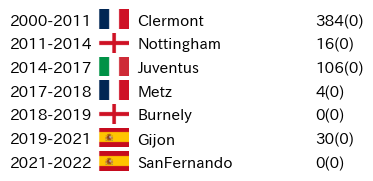

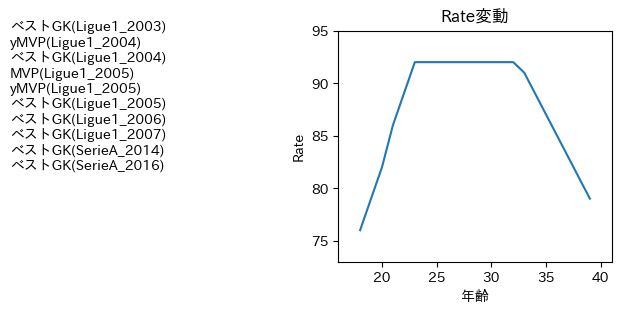

,名前,uuid,年齢,Rate,残契約,ポジション,リーグ,リーグレベル,年度,国,チーム,レンタル元,分類,順位,試合数,出場時間,goal,assist,CS,評価点,MOM,怪我欠場,怪我回数,賞,全ポジション回数
1174,Errick,d5931b64-91a0-11ed-8327-8791859fff36,18,76,5,GK,Ligue1,1,2000,France,Clermont,,リーグ,10位,37,3330.0,0,0,10,5.568977,0,2,1,,"{""GK"": 37}"
4411,Errick,d5931b64-91a0-11ed-8327-8791859fff36,19,79,4,GK,Ligue1,1,2001,France,Clermont,,リーグ,12位,30,2700.0,0,0,8,5.812256,1,10,2,,"{""GK"": 30}"
7938,Errick,d5931b64-91a0-11ed-8327-8791859fff36,20,82,3,GK,Ligue1,1,2002,France,Clermont,,リーグ,11位,38,3420.0,0,0,10,5.981239,0,0,0,,"{""GK"": 38}"
11503,Errick,d5931b64-91a0-11ed-8327-8791859fff36,21,86,2,GK,Ligue1,1,2003,France,Clermont,,リーグ,5位,29,2610.0,0,0,11,6.309896,1,11,2,"ベストGK(Ligue1_2003),","{""GK"": 29}"
15253,Errick,d5931b64-91a0-11ed-8327-8791859fff36,22,89,1,GK,Ligue1,1,2004,France,Clermont,,リーグ,2位,33,2970.0,0,0,15,6.630999,6,5,0,"yMVP(Ligue1_2004),ベストGK(Ligue1_2004),","{""GK"": 33}"
18975,Errick,d5931b64-91a0-11ed-8327-8791859fff36,23,92,0,GK,Ligue1,1,2005,France,Clermont,,リーグ,1位,29,2610.0,0,0,11,6.581283,1,11,2,"MVP(Ligue1_2005),yMVP(Ligue1_2005),ベストGK(Ligue...","{""GK"": 29}"
22577,Errick,d5931b64-91a0-11ed-8327-8791859fff36,24,92,4,GK,Ligue1,1,2006,France,Clermont,,リーグ,2位,31,2790.0,0,0,15,6.660541,5,8,1,"ベストGK(Ligue1_2006),","{""GK"": 31}"
26152,Errick,d5931b64-91a0-11ed-8327-8791859fff36,25,92,3,GK,Ligue1,1,2007,France,Clermont,,リーグ,4位,38,3420.0,0,0,15,6.395753,8,0,0,"ベストGK(Ligue1_2007),","{""GK"": 38}"
29722,Errick,d5931b64-91a0-11ed-8327-8791859fff36,26,92,2,GK,Ligue1,1,2008,France,Clermont,,リーグ,9位,38,3420.0,0,0,11,6.030022,1,0,0,,"{""GK"": 38}"
33362,Errick,d5931b64-91a0-11ed-8327-8791859fff36,27,92,1,GK,Ligue1,1,2009,France,Clermont,,リーグ,8位,31,2790.0,0,0,9,6.058676,5,8,1,,"{""GK"": 31}"


In [40]:
uuid_ = "d5931b64-91a0-11ed-8327-8791859fff36"
print_player(ws, all_member, uuid_)

## 年ごとの結果

In [11]:
year = 2026
league_num = 0
league_name = f"{England.leagues[league_num].name}_{year}"
competition_name = f"FA杯_{year}"
England.leagues[league_num].team_result[league_name]
England.competition_result[competition_name]

NameError: name 'England' is not defined

In [ ]:
output = ws.players_result
output.sort_values("Rate", ascending=False).head(30)

In [ ]:
all_member.sort_values("年齢", ascending=False).head(30)

In [ ]:
all_member[all_member["成長タイプ"]=="legend"]

## 全選手成績

In [33]:
output = ws.players_result
#output = output[output["リーグレベル"]==3]
#output = output[output["分類"]=="リーグ"]
output.groupby("uuid").sum()[["試合数", "goal", "assist", "CS", "MOM", "怪我欠場"]].sort_values("MOM", ascending=False).head(20)

,試合数,goal,assist,CS,MOM,怪我欠場
uuid,,,,,,
d4ae185c-91a0-11ed-8327-8791859fff36,743,479,71,104,160,137
749fc53e-91a3-11ed-8327-8791859fff36,734,460,49,109,141,0
2b947e22-91a6-11ed-8327-8791859fff36,487,245,121,163,120,61
d91933ae-91a0-11ed-8327-8791859fff36,763,450,72,81,113,161
d3eb450c-91a0-11ed-8327-8791859fff36,523,310,32,64,110,189
88aa5582-91a1-11ed-8327-8791859fff36,739,259,151,127,110,41
c9f592e6-91a0-11ed-8327-8791859fff36,488,305,41,88,109,83
cac272bc-91a4-11ed-8327-8791859fff36,618,275,93,152,105,69
d8247b24-91a1-11ed-8327-8791859fff36,653,234,101,143,104,0


,名前,年齢,生まれ年,成長タイプ
28859,Markel,48,1982,legend


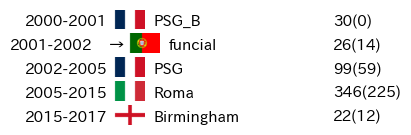

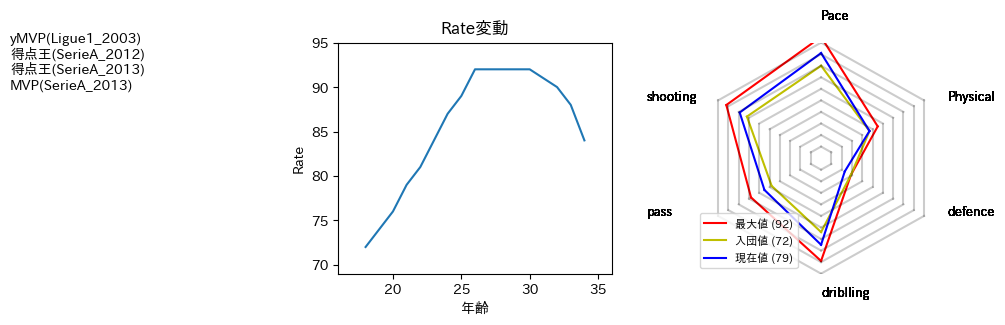

,名前,uuid,年齢,Rate,残契約,ポジション,リーグ,リーグレベル,年度,国,チーム,レンタル元,分類,順位,試合数,出場時間,goal,assist,CS,評価点,MOM,怪我欠場,怪我回数,賞,全ポジション回数
3,Markel,d3eb450c-91a0-11ed-8327-8791859fff36,18,72,4,ST,Under League,10,2000,France,PSG_B,,Bチーム,記録なし,30,1800.00,0,0,0,0.000000,0,0,0,,
4235,Markel,d3eb450c-91a0-11ed-8327-8791859fff36,19,74,3,ST,Liga Portugal2,3,2001,Portugal,funcial,PSG,リーグ,2位,25,2077.50,14,0,3,6.424471,4,15,2,,"{""ST"": 25}"
7238,Markel,d3eb450c-91a0-11ed-8327-8791859fff36,20,76,2,ST,Ligue1,1,2002,France,PSG,,リーグ,6位,35,2936.25,19,1,5,6.179189,3,4,1,,"{""ST"": 35}"
10852,Markel,d3eb450c-91a0-11ed-8327-8791859fff36,21,79,1,ST,Ligue1,1,2003,France,PSG,,リーグ,3位,23,1938.75,17,0,4,6.698359,4,17,2,"yMVP(Ligue1_2003),","{""ST"": 23}"
14599,Markel,d3eb450c-91a0-11ed-8327-8791859fff36,22,81,0,ST,Ligue1,1,2004,France,PSG,,リーグ,14位,36,3015.00,22,1,1,6.086617,8,3,1,,"{""ST"": 36}"
18111,Markel,d3eb450c-91a0-11ed-8327-8791859fff36,23,84,3,ST,SerieA,1,2005,Italy,Roma,,リーグ,4位,31,2591.25,18,0,4,6.331609,3,10,3,,"{""ST"": 31}"
21550,Markel,d3eb450c-91a0-11ed-8327-8791859fff36,24,87,2,ST,SerieA,1,2006,Italy,Roma,,リーグ,7位,33,2831.25,27,2,8,6.824182,7,7,2,,"{""ST"": 33}"
25040,Markel,d3eb450c-91a0-11ed-8327-8791859fff36,25,89,1,ST,SerieA,1,2007,Italy,Roma,,リーグ,5位,38,3251.25,18,4,6,6.420536,5,0,0,,"{""ST"": 38}"
28629,Markel,d3eb450c-91a0-11ed-8327-8791859fff36,26,92,0,ST,SerieA,1,2008,Italy,Roma,,リーグ,5位,29,2471.25,13,2,6,6.430382,6,11,2,,"{""ST"": 29}"
32182,Markel,d3eb450c-91a0-11ed-8327-8791859fff36,27,92,3,ST,SerieA,1,2009,Italy,Roma,,リーグ,12位,28,2358.75,19,2,0,6.345920,10,13,3,,"{""ST"": 28}"


In [37]:
uuid_ = "d3eb450c-91a0-11ed-8327-8791859fff36"
print_player(ws, all_member, uuid_)